In [1]:
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)
 

In [2]:
def get_distance(all_dist):
  pos = 0
  dist_btw = {}
  for key in list(all_dist.keys()):

    try:

      if len(all_dist[key]) > 1:
        dist_btw[key] = all_dist[key][1]


        if len(list(all_dist.values())[pos+1])== 1:
          break
    except:
      pass

    pos += 1
  temp = {k: v for k, v in all_dist.items() if k not in dist_btw}

  return dist_btw,temp

In [3]:
import math
def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        if math.isnan(item) == False:
              return i
        else:
            i=i+1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot properities 

plt.figure(figsize=(15,10))

# Reading data
data= pd.read_csv("Results_cell_1.csv")
slices = data['Slice'].to_numpy()
area = data['Area'].to_numpy()
mean = data['Mean'].to_numpy()
x = data['X'].to_numpy()
y = data['Y'].to_numpy()
# Creating intensity column
data['Total_Intensity'] = data['Area']*mean
total_intensity = data['Total_Intensity'].to_numpy()
total_circularity = data['Circ.'].to_numpy()

# Get unique slices
slice_unique = np.unique(slices)

# Define arr and dictonary 
dist_arr = []
intensity_dict = {}
circularity_dict = {}
intensity_red = {}
intensity_blue = {}
intensity_green = {}
intensity_yellow = {}
intensity_black = {}
intensity_magenta = {}
circularity_black = {}
circularity_red = {}
circularity_blue = {}
circularity_green = {}
circularity_yellow = {}
circularity_magenta = {}
dist_dic = {}



# set threshold of distance
threshold = 15 # pixels,verify this value by checking the image

# get the reference center of the segmentation
   
x_init = 46.026
y_init = 67.711


for s in slice_unique:

    ind = np.where(slices == s)
    x_ = x[ind]
    y_ = y[ind]
    area_ = area[ind]
    slice_ = slices[ind]
    intensity_ = total_intensity[ind]
    circularity_ = total_circularity[ind]

    # filter out small area (noise)
    area1 = np.where(area_ < 3) 
    dist_list = []
    intensity_list = []
    circularity_list = []
    if area1[0].size > 0:
      pass
      
    else:
        
        for a in np.array(list(zip(x_,y_))):
            
            dist = np.sqrt((x_init-a[0])**2 + (y_init-a[1])**2)
      
            if dist < threshold:
                
                # add the points to plot curve
                x_middle_ind = np.where((x_==a[0]) & (y_==a[1]))[0]                
                x_middle = x_[x_middle_ind]
                intensity_middle = intensity_[x_middle_ind]
                circularity_middle = circularity_[x_middle_ind]

                # creating distance data
                dist_list.append(dist)
                dist_list.sort()
                dist_dic[s] = dist_list

                # creating circularity data
                circularity_middle = np.asscalar(circularity_middle)
                circularity_list.append(circularity_middle)
                circularity_list.sort()
                circularity_dict[s] = circularity_list
                #creating  intensity data
                intensity_middle = np.asscalar(intensity_middle)
                intensity_list.append(intensity_middle)
                intensity_list.sort()
                intensity_dict[s] = intensity_list

                # update the x_init and y_init by the new center
                x_init = (x_init+a[0])*0.5
                y_init = (y_init+a[1])*0.5
      



# Get distances between two nucleus 

dist_btw_1,temp_1 = get_distance(dist_dic)
dist_btw_2,temp_2 = get_distance(temp_1)
dist_btw_3,temp_3 = get_distance(temp_2)


# Find to distance slope is positive or negative, to see distance is decrasing or increasing
tred_1 = trendline(list(dist_btw_1.keys()),list(dist_btw_1.values()))
tred_2 = trendline(list(dist_btw_2.keys()),list(dist_btw_2.values()))
tred_3 = trendline(list(dist_btw_3.keys()),list(dist_btw_3.values()))

# Define conditions, If distance slope is negatif(decrasing) and last distance is near to merge(<7)
# Ploting
merge_threshold = 10
if tred_1 < 1 and tred_2 < 1:

  keys_1 = []
  keys_2 = list(dist_btw_1.keys())
  keys_3 = []
  keys_4 = list(dist_btw_2.keys())
  keys_5 = []
  keys_6 = list(dist_btw_3.keys())

  for key in list(dist_dic.keys()):
    if key < list(dist_btw_1.keys())[0]:
      keys_1.append(key)
    if key > list(dist_btw_1.keys())[-1] and key < list(dist_btw_2.keys())[0] :
      keys_3.append(key)
    if key > list(dist_btw_2.keys())[-1] and key < list(dist_btw_3.keys())[0] :
      keys_5.append(key)

  for key in keys_1:
    intensity_yellow[key] = intensity_dict[key][0]
    circularity_yellow[key] = circularity_dict[key][0]
  
  for key in keys_2:
    intensity_yellow[key] = intensity_dict[key][1]
    intensity_magenta[key] = intensity_dict[key][0]
    circularity_yellow[key] = circularity_dict[key][1]
    circularity_magenta[key] = circularity_dict[key][0]

  for key in keys_3:
    intensity_black[key] = intensity_dict[key][0]
    circularity_black[key] = circularity_dict[key][0]


  for key in keys_4:
    intensity_red[key] = intensity_dict[key][1]
    intensity_blue[key] = intensity_dict[key][0]
    circularity_red[key] = circularity_dict[key][1]
    circularity_blue[key] = circularity_dict[key][0]

  for key in keys_5:
    intensity_green[key] = intensity_dict[key][0]
    circularity_green[key] = circularity_dict[key][0]
 
    
  for key in list(dist_dic.keys()):
    if key not in list(intensity_black.keys()):
      intensity_black[key] = np.nan
    if key not in list(intensity_blue.keys()):
      intensity_blue[key] = np.nan
    if key not in list(intensity_red.keys()):
      intensity_red[key] = np.nan
    if key not in list(intensity_yellow.keys()):
      intensity_yellow[key] = np.nan
    if key not in list(intensity_magenta.keys()):
      intensity_magenta[key] = np.nan
    if key not in list(intensity_green.keys()):
      intensity_green[key] = np.nan

    if key not in list(circularity_black.keys()):
      circularity_black[key] = np.nan
    if key not in list(circularity_blue.keys()):
      circularity_blue[key] = np.nan
    if key not in list(circularity_red.keys()):
      circularity_red[key] = np.nan
    if key not in list(circularity_yellow.keys()):
      circularity_yellow[key] = np.nan
    if key not in list(circularity_green.keys()):
      circularity_green[key] = np.nan
    if key not in list(circularity_magenta.keys()):
      circularity_magenta[key] = np.nan
    

  red_intensity = {}
  blue_intensity = {}
  black_intensity = {}
  yellow_intensity = {}
  green_intensity = {}
  magenta_intensity = {}

  red_circularity = {}
  blue_circularity = {}
  black_circularity = {}
  yellow_circularity = {}
  green_circularity = {}
  magenta_circularity = {}
  l = []

  for key in list(dist_dic.keys()):
    if key < 200:
      red_intensity[key] = intensity_red[key]
      blue_intensity[key] = intensity_blue[key]
      black_intensity[key] = intensity_black[key]
      green_intensity[key] = intensity_green[key]
      yellow_intensity[key] = intensity_yellow[key]
      magenta_intensity[key] = intensity_magenta[key]

      red_circularity[key] = circularity_red[key]
      blue_circularity[key] = circularity_blue[key]
      black_circularity[key] = circularity_black[key]
      green_circularity[key] = circularity_green[key]
      yellow_circularity[key] = circularity_yellow[key]
      magenta_circularity[key] = circularity_magenta[key]
      l.append(key)


 
  red = '#0074c6'
  blue = "#f8481c"
  green = '#8a2897'
    

  fig,ax=plt.subplots(2,figsize=(15,10))

  ax[0].plot(l, list(yellow_intensity.values()), color="#0074c6")
  ax[0].scatter(l, list(yellow_intensity.values()), color="#0074c6", s=10)
  n_a_yellow = np.array(list(yellow_intensity.values()))
  n_a_yellow_last = (~np.isnan(n_a_yellow)).cumsum().argmax()

  ax[0].plot(l, list(magenta_intensity.values()), color="#f8481c")
  ax[0].scatter(l, list(magenta_intensity.values()),color="#f8481c", s=10)
  n_a_magenta = np.array(list(magenta_intensity.values()))
  n_a_magenta_last = (~np.isnan(n_a_magenta)).cumsum().argmax()  

  ax[0].plot(l, list(black_intensity.values()), color="#edb120")
  ax[0].scatter(l, list(black_intensity.values()),color="#edb120", s=10)
  n_a_black = np.array(list(black_intensity.values()))
  n_a_black_last = (~np.isnan(n_a_black)).cumsum().argmax()  
  n_a_black_frist = firstNonNan(list(black_intensity.values())) 

  ax[0].plot([l[n_a_yellow_last],l[n_a_black_frist]],[n_a_yellow[n_a_yellow_last],n_a_black[n_a_black_frist]],c='#edb120')
  ax[0].plot([l[n_a_magenta_last],l[n_a_black_frist]],[n_a_magenta[n_a_magenta_last],n_a_black[n_a_black_frist]],c='#edb120')


  ax[0].plot(l, list(red_intensity.values()), color="#0074c6")
  ax[0].scatter(l, list(red_intensity.values()), color="#0074c6", s=10)
  n_a_red = np.array(list(red_intensity.values()))
  n_a_red_last = (~np.isnan(n_a_red)).cumsum().argmax()
  n_a_red_frist = firstNonNan(list(red_intensity.values()))  
    
  ax[0].plot(l, list(blue_intensity.values()), color="#f8481c")
  ax[0].scatter(l, list(blue_intensity.values()),color="#f8481c", s=10)
  n_a_blue = np.array(list(blue_intensity.values()))
  n_a_blue_last = (~np.isnan(n_a_blue)).cumsum().argmax()  
  n_a_blue_frist = firstNonNan(list(blue_intensity.values())) 
    
    
  ax[0].plot([l[n_a_black_last],l[n_a_red_frist]],[n_a_black[n_a_black_last],n_a_red[n_a_red_frist]],c='#edb120')
  ax[0].plot([l[n_a_black_last],l[n_a_blue_frist]],[n_a_black[n_a_black_last],n_a_blue[n_a_blue_frist]],c='#edb120')
    
  ax[0].plot(l, list(green_intensity.values()), color='#8a2897')
  ax[0].scatter(l, list(green_intensity.values()),c='#8a2897',s=10)
  n_a_green_frist = firstNonNan(list(green_intensity.values()))  
  n_a_green = np.array(list(green_intensity.values()))

  ax[0].plot([l[n_a_red_last],l[n_a_green_frist]],[n_a_red[n_a_red_last],n_a_green[n_a_green_frist]],c='#8a2897')
  ax[0].plot([l[n_a_blue_last],l[n_a_green_frist]],[n_a_blue[n_a_blue_last],n_a_green[n_a_green_frist]],c='#8a2897')

  ax[0].set_xlabel('Time (min)')
  ax[0].set_ylabel('Total fluorescence (AU)')


  ax[1].plot(l, list(yellow_circularity.values()), color="#0074c6")
  ax[1].scatter(l, list(yellow_circularity.values()), color="#0074c6", s=10)
  n_a_yellow = np.array(list(yellow_circularity.values()))
  n_a_yellow_last = (~np.isnan(n_a_yellow)).cumsum().argmax()

  ax[1].plot(l, list(magenta_circularity.values()), color="#f8481c")
  ax[1].scatter(l, list(magenta_circularity.values()),color="#f8481c", s=10)
  n_a_magenta = np.array(list(magenta_circularity.values()))
  n_a_magenta_last = (~np.isnan(n_a_magenta)).cumsum().argmax()  

  ax[1].plot(l, list(black_circularity.values()), color="#edb120")
  ax[1].scatter(l, list(black_circularity.values()),color="#edb120", s=10)
  n_a_black = np.array(list(black_circularity.values()))
  n_a_black_last = (~np.isnan(n_a_black)).cumsum().argmax()  
  n_a_black_frist = firstNonNan(list(black_circularity.values())) 

  ax[1].plot([l[n_a_yellow_last],l[n_a_black_frist]],[n_a_yellow[n_a_yellow_last],n_a_black[n_a_black_frist]],c='#edb120')
  ax[1].plot([l[n_a_magenta_last],l[n_a_black_frist]],[n_a_magenta[n_a_magenta_last],n_a_black[n_a_black_frist]],c='#edb120')


  ax[1].plot(l, list(red_circularity.values()), color="#0074c6")
  ax[1].scatter(l, list(red_circularity.values()), color="#0074c6", s=10)
  n_a_red = np.array(list(red_circularity.values()))
  n_a_red_last = (~np.isnan(n_a_red)).cumsum().argmax()
  n_a_red_frist = firstNonNan(list(red_circularity.values()))  
    
  ax[1].plot(l, list(blue_circularity.values()), color="#f8481c")
  ax[1].scatter(l, list(blue_circularity.values()),color="#f8481c", s=10)
  n_a_blue = np.array(list(blue_circularity.values()))
  n_a_blue_last = (~np.isnan(n_a_blue)).cumsum().argmax()  
  n_a_blue_frist = firstNonNan(list(blue_circularity.values())) 
    
    
  ax[1].plot([l[n_a_black_last],l[n_a_red_frist]],[n_a_black[n_a_black_last],n_a_red[n_a_red_frist]],c='#edb120')
  ax[1].plot([l[n_a_black_last],l[n_a_blue_frist]],[n_a_black[n_a_black_last],n_a_blue[n_a_blue_frist]],c='#edb120')
    
  ax[1].plot(l, list(green_circularity.values()), color='#8a2897')
  ax[1].scatter(l, list(green_circularity.values()),c='#8a2897',s=10)
  n_a_green_frist = firstNonNan(list(green_circularity.values()))  
  n_a_green = np.array(list(green_circularity.values()))

  ax[1].plot([l[n_a_red_last],l[n_a_green_frist]],[n_a_red[n_a_red_last],n_a_green[n_a_green_frist]],c='#8a2897')
  ax[1].plot([l[n_a_blue_last],l[n_a_green_frist]],[n_a_blue[n_a_blue_last],n_a_green[n_a_green_frist]],c='#8a2897')

  ax[1].set_xlabel('Time')
  ax[1].set_ylabel('Circularity')
    
  plt.savefig("cell_1.pdf")
  plt.show()

else:
  
  print("They are not in the threshold!")


<ipython-input-4-62a779e1c04c>:91: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  circularity_middle = np.asscalar(circularity_middle)
<ipython-input-4-62a779e1c04c>:96: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  intensity_middle = np.asscalar(intensity_middle)
<ipython-input-4-62a779e1c04c>:118: RankWarning: Polyfit may be poorly conditioned
  tred_3 = trendline(list(dist_btw_3.keys()),list(dist_btw_3.values()))


<Figure size 1080x720 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot properities 

plt.figure(figsize=(15,10))

# Reading data
data = pd.read_csv("./Results_cell_3.csv")
slices = data['Slice'].to_numpy()
area = data['Area'].to_numpy()
mean = data['Mean'].to_numpy()
x = data['X'].to_numpy()
y = data['Y'].to_numpy()
# Creating intensity column
data['Total_Intensity'] = data['Area']*mean
total_intensity = data['Total_Intensity'].to_numpy()
total_circularity = data['Circ.'].to_numpy()

# Get unique slices
slice_unique = np.unique(slices)

# Define arr and dictonary 
dist_arr = []
intensity_dict = {}
circularity_dict = {}
intensity_red = {}
intensity_blue = {}
intensity_green = {}
intensity_yellow = {}
intensity_black = {}
intensity_magenta = {}
circularity_black = {}
circularity_red = {}
circularity_blue = {}
circularity_green = {}
circularity_yellow = {}
circularity_magenta = {}
dist_dic = {}



# set threshold of distance
threshold = 15 # pixels,verify this value by checking the image


x_init = 466
y_init = 110
red = '#0074c6'
blue = "#f8481c"
green = '#8a2897'


for s in slice_unique:

    ind = np.where(slices == s)
    x_ = x[ind]
    y_ = y[ind]
    area_ = area[ind]
    slice_ = slices[ind]
    intensity_ = total_intensity[ind]
    circularity_ = total_circularity[ind]

    # filter out small area (noise)
    area1 = np.where(area_ < 3) 
    dist_list = []
    intensity_list = []
    circularity_list = []
    if area1[0].size > 0:
      pass
      
    else:
        
        for a in np.array(list(zip(x_,y_))):
            
            dist = np.sqrt((x_init-a[0])**2 + (y_init-a[1])**2)
      
            if dist < threshold:
                
                # add the points to plot curve
                x_middle_ind = np.where((x_==a[0]) & (y_==a[1]))[0]                
                x_middle = x_[x_middle_ind]
                intensity_middle = intensity_[x_middle_ind]
                circularity_middle = circularity_[x_middle_ind]

                # creating distance data
                dist_list.append(dist)
                dist_list.sort()
                dist_dic[s] = dist_list

                # creating circularity data
                circularity_middle = np.asscalar(circularity_middle)
                circularity_list.append(circularity_middle)
                circularity_list.sort()
                circularity_dict[s] = circularity_list
                #creating  intensity data
                intensity_middle = np.asscalar(intensity_middle)
                intensity_list.append(intensity_middle)
                intensity_list.sort()
                intensity_dict[s] = intensity_list

                # update the x_init and y_init by the new center
                x_init = (x_init+a[0])*0.5
                y_init = (y_init+a[1])*0.5
      



# Get distances between two nucleus 

dist_btw_1,temp_1 = get_distance(dist_dic)



# Find to distance slope is positive or negative, to see distance is decrasing or increasing
tred_1 = trendline(list(dist_btw_1.keys()),list(dist_btw_1.values()))


# Define conditions, If distance slope is negatif(decrasing) 

if tred_1 < 1:

  keys_1 = []
  keys_2 = list(dist_btw_1.keys())
  keys_3 = []


  for key in list(dist_dic.keys()):
    if key < list(dist_btw_1.keys())[0]:
      keys_1.append(key)
    if key > list(dist_btw_1.keys())[-1]:
      keys_3.append(key)
   

  for key in keys_1:
    intensity_red[key] = intensity_dict[key][0]
    circularity_red[key] = circularity_dict[key][0]
  
  for key in keys_2:
    intensity_red[key] = intensity_dict[key][1]
    intensity_blue[key] = intensity_dict[key][0]
    circularity_red[key] = circularity_dict[key][1]
    circularity_blue[key] = circularity_dict[key][0]

  for key in keys_3:
    intensity_green[key] = intensity_dict[key][0]
    circularity_green[key] = circularity_dict[key][0]

    
  for key in list(dist_dic.keys()):
    
    if key not in list(intensity_blue.keys()):
      intensity_blue[key] = np.nan
    if key not in list(intensity_red.keys()):
      intensity_red[key] = np.nan
    if key not in list(intensity_green.keys()):
      intensity_green[key] = np.nan

    
    if key not in list(circularity_blue.keys()):
      circularity_blue[key] = np.nan
    if key not in list(circularity_red.keys()):
      circularity_red[key] = np.nan
    if key not in list(circularity_green.keys()):
      circularity_green[key] = np.nan
 
    

  red_intensity = {}
  blue_intensity = {}
  green_intensity = {}

  red_circularity = {}
  blue_circularity = {}
  green_circularity = {}
  l = []

  for key in list(dist_dic.keys()):
    if key < 200:
      red_intensity[key] = intensity_red[key]
      blue_intensity[key] = intensity_blue[key]
      green_intensity[key] = intensity_green[key]

      red_circularity[key] = circularity_red[key]
      blue_circularity[key] = circularity_blue[key]
      green_circularity[key] = circularity_green[key]
      l.append(key)


 
  fig,ax=plt.subplots(2,figsize=(15,10))
  ax[0].plot(l, list(red_intensity.values()), color="#0074c6")
  ax[0].scatter(l, list(red_intensity.values()), color="#0074c6", s=10)
  n_a_red = np.array(list(red_intensity.values()))
  n_a_red_last = (~np.isnan(n_a_red)).cumsum().argmax()
    
    
  ax[0].plot(l, list(blue_intensity.values()), color="#f8481c")
  ax[0].scatter(l, list(blue_intensity.values()),color="#f8481c", s=10)
  n_a_blue = np.array(list(blue_intensity.values()))
  n_a_blue_last = (~np.isnan(n_a_blue)).cumsum().argmax()    
    
  ax[0].plot(l, list(green_intensity.values()), color='#8a2897')
  ax[0].scatter(l, list(green_intensity.values()),c='#8a2897',s=10)
  n_a_green_frist = firstNonNan(list(green_intensity.values()))  
  n_a_green = np.array(list(green_intensity.values()))

  ax[0].plot([l[n_a_red_last],l[n_a_green_frist]],[n_a_red[n_a_red_last],n_a_green[n_a_green_frist]],c='#8a2897')
  ax[0].plot([l[n_a_blue_last],l[n_a_green_frist]],[n_a_blue[n_a_blue_last],n_a_green[n_a_green_frist]],c='#8a2897')

  ax[0].set_xlabel('Time')
  ax[0].set_ylabel('Total fluorescence (AU)')

  
  ax[1].plot(l, list(red_circularity.values()), color="#0074c6")
  ax[1].scatter(l, list(red_circularity.values()), color="#0074c6", s=10)
  n_a_red = np.array(list(red_circularity.values()))
  n_a_red_last = (~np.isnan(n_a_red)).cumsum().argmax()

  
  ax[1].plot(l, list(blue_circularity.values()), color="#f8481c")
  ax[1].scatter(l, list(blue_circularity.values()),color="#f8481c", s=10)
  n_a_blue = np.array(list(blue_circularity.values()))
  n_a_blue_last = (~np.isnan(n_a_blue)).cumsum().argmax()  
    
  
  ax[1].plot(l, list(green_circularity.values()), color='#8a2897')
  ax[1].scatter(l, list(green_circularity.values()),c='#8a2897',s=10)
  n_a_green_frist = firstNonNan(list(green_circularity.values()))  
  n_a_green = np.array(list(green_circularity.values()))

  ax[1].plot([l[n_a_red_last],l[n_a_green_frist]],[n_a_red[n_a_red_last],n_a_green[n_a_green_frist]],c='#8a2897')
  ax[1].plot([l[n_a_blue_last],l[n_a_green_frist]],[n_a_blue[n_a_blue_last],n_a_green[n_a_green_frist]],c='#8a2897')

  ax[1].set_xlabel('Time')
  ax[1].set_ylabel('Circularity')

  plt.savefig("cell_3.pdf")
  plt.show()
  

else:
  
  print("They are not in the threshold!")


 


<ipython-input-5-3d0524dda355>:93: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  circularity_middle = np.asscalar(circularity_middle)
<ipython-input-5-3d0524dda355>:98: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  intensity_middle = np.asscalar(intensity_middle)


<Figure size 1080x720 with 0 Axes>

<ipython-input-6-08f289c3e2b7>:90: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  circularity_middle = np.asscalar(circularity_middle)
<ipython-input-6-08f289c3e2b7>:95: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  intensity_middle = np.asscalar(intensity_middle)


<Figure size 1080x720 with 0 Axes>

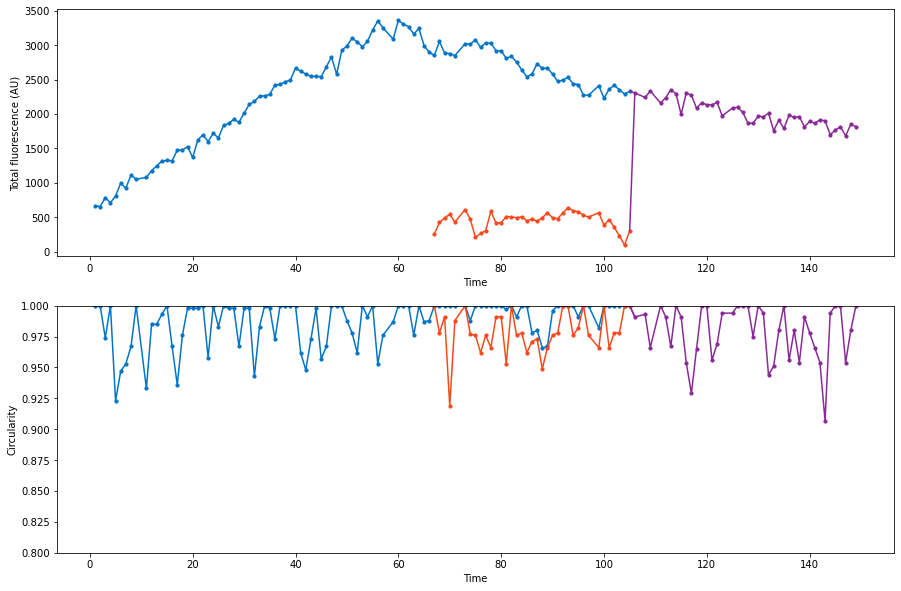

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot properities 

plt.figure(figsize=(15,10))

# Reading data
data = pd.read_csv("./Results_cell_5.csv")
slices = data['Slice'].to_numpy()
area = data['Area'].to_numpy()
mean = data['Mean'].to_numpy()
x = data['X'].to_numpy()
y = data['Y'].to_numpy()
# Creating intensity column
data['Total_Intensity'] = data['Area']*mean
total_intensity = data['Total_Intensity'].to_numpy()
total_circularity = data['Circ.'].to_numpy()

# Get unique slices
slice_unique = np.unique(slices)

# Define arr and dictonary 
dist_arr = []
intensity_dict = {}
circularity_dict = {}
intensity_red = {}
intensity_blue = {}
intensity_green = {}
intensity_yellow = {}
intensity_black = {}
intensity_magenta = {}
circularity_black = {}
circularity_red = {}
circularity_blue = {}
circularity_green = {}
circularity_yellow = {}
circularity_magenta = {}
dist_dic = {}



# set threshold of distance
threshold = 15 # pixels,verify this value by checking the image


x_init = 178
y_init = 85


for s in slice_unique:

    ind = np.where(slices == s)
    x_ = x[ind]
    y_ = y[ind]
    area_ = area[ind]
    slice_ = slices[ind]
    intensity_ = total_intensity[ind]
    circularity_ = total_circularity[ind]

    # filter out small area (noise)
    area1 = np.where(area_ < 3) 
    dist_list = []
    intensity_list = []
    circularity_list = []
    if area1[0].size > 0:
      pass
      
    else:
        
        for a in np.array(list(zip(x_,y_))):
            
            dist = np.sqrt((x_init-a[0])**2 + (y_init-a[1])**2)
      
            if dist < threshold:
                
                # add the points to plot curve
                x_middle_ind = np.where((x_==a[0]) & (y_==a[1]))[0]                
                x_middle = x_[x_middle_ind]
                intensity_middle = intensity_[x_middle_ind]
                circularity_middle = circularity_[x_middle_ind]

                # creating distance data
                dist_list.append(dist)
                dist_list.sort()
                dist_dic[s] = dist_list

                # creating circularity data
                circularity_middle = np.asscalar(circularity_middle)
                circularity_list.append(circularity_middle)
                circularity_list.sort()
                circularity_dict[s] = circularity_list
                #creating  intensity data
                intensity_middle = np.asscalar(intensity_middle)
                intensity_list.append(intensity_middle)
                intensity_list.sort()
                intensity_dict[s] = intensity_list

                # update the x_init and y_init by the new center
                x_init = (x_init+a[0])*0.5
                y_init = (y_init+a[1])*0.5
      



# Get distances between two nucleus 

dist_btw_1,temp_1 = get_distance(dist_dic)



# Find to distance slope is positive or negative, to see distance is decrasing or increasing
tred_1 = trendline(list(dist_btw_1.keys()),list(dist_btw_1.values()))


# Define conditions, If distance slope is negatif(decrasing) 

if tred_1 < 1:

  keys_1 = []
  keys_2 = list(dist_btw_1.keys())
  keys_3 = []


  for key in list(dist_dic.keys()):
    if key < list(dist_btw_1.keys())[0]:
      keys_1.append(key)
    if key > list(dist_btw_1.keys())[-1]:
      keys_3.append(key)
   

  for key in keys_1:
    intensity_red[key] = intensity_dict[key][0]
    circularity_red[key] = circularity_dict[key][0]
  
  for key in keys_2:
    intensity_red[key] = intensity_dict[key][1]
    intensity_blue[key] = intensity_dict[key][0]
    circularity_red[key] = circularity_dict[key][1]
    circularity_blue[key] = circularity_dict[key][0]

  for key in keys_3:
    intensity_green[key] = intensity_dict[key][0]
    circularity_green[key] = circularity_dict[key][0]

    
  for key in list(dist_dic.keys()):
    
    if key not in list(intensity_blue.keys()):
      intensity_blue[key] = np.nan
    if key not in list(intensity_red.keys()):
      intensity_red[key] = np.nan
    if key not in list(intensity_green.keys()):
      intensity_green[key] = np.nan

    
    if key not in list(circularity_blue.keys()):
      circularity_blue[key] = np.nan
    if key not in list(circularity_red.keys()):
      circularity_red[key] = np.nan
    if key not in list(circularity_green.keys()):
      circularity_green[key] = np.nan
 
    

  red_intensity = {}
  blue_intensity = {}
  green_intensity = {}

  red_circularity = {}
  blue_circularity = {}
  green_circularity = {}
  l = []

  for key in list(dist_dic.keys()):
    if key < 150:
      red_intensity[key] = intensity_red[key]
      blue_intensity[key] = intensity_blue[key]
      green_intensity[key] = intensity_green[key]

      red_circularity[key] = circularity_red[key]
      blue_circularity[key] = circularity_blue[key]
      green_circularity[key] = circularity_green[key]
      l.append(key)


 
  fig,ax=plt.subplots(2,figsize=(15,10))
  ax[0].plot(l, list(red_intensity.values()), color="#0074c6")
  ax[0].scatter(l, list(red_intensity.values()), color="#0074c6", s=10)
  n_a_red = np.array(list(red_intensity.values()))
  n_a_red_last = (~np.isnan(n_a_red)).cumsum().argmax()
    
    
  ax[0].plot(l, list(blue_intensity.values()), color="#f8481c")
  ax[0].scatter(l, list(blue_intensity.values()),color="#f8481c", s=10)
  n_a_blue = np.array(list(blue_intensity.values()))
  n_a_blue_last = (~np.isnan(n_a_blue)).cumsum().argmax()    
    
  ax[0].plot(l, list(green_intensity.values()), color='#8a2897')
  ax[0].scatter(l, list(green_intensity.values()),c='#8a2897',s=10)
  n_a_green_frist = firstNonNan(list(green_intensity.values()))  
  n_a_green = np.array(list(green_intensity.values()))

  ax[0].plot([l[n_a_red_last],l[n_a_green_frist]],[n_a_red[n_a_red_last],n_a_green[n_a_green_frist]],c='#8a2897')
  ax[0].plot([l[n_a_blue_last],l[n_a_green_frist]],[n_a_blue[n_a_blue_last],n_a_green[n_a_green_frist]],c='#8a2897')

  ax[0].set_xlabel('Time')
  ax[0].set_ylabel('Total fluorescence (AU)')

  
  ax[1].plot(l, list(red_circularity.values()), color="#0074c6")
  ax[1].scatter(l, list(red_circularity.values()), color="#0074c6", s=10)
  n_a_red = np.array(list(red_circularity.values()))
  n_a_red_last = (~np.isnan(n_a_red)).cumsum().argmax()

  
  ax[1].plot(l, list(blue_circularity.values()), color="#f8481c")
  ax[1].scatter(l, list(blue_circularity.values()),color="#f8481c", s=10)
  n_a_blue = np.array(list(blue_circularity.values()))
  n_a_blue_last = (~np.isnan(n_a_blue)).cumsum().argmax()  
    
  
  ax[1].plot(l, list(green_circularity.values()), color='#8a2897')
  ax[1].scatter(l, list(green_circularity.values()),c='#8a2897',s=10)
  n_a_green_frist = firstNonNan(list(green_circularity.values()))  
  n_a_green = np.array(list(green_circularity.values()))

  ax[1].plot([l[n_a_red_last],l[n_a_green_frist]],[n_a_red[n_a_red_last],n_a_green[n_a_green_frist]],c='#8a2897')
  ax[1].plot([l[n_a_blue_last],l[n_a_green_frist]],[n_a_blue[n_a_blue_last],n_a_green[n_a_green_frist]],c='#8a2897')

  ax[1].set_xlabel('Time')
  ax[1].set_ylabel('Circularity')
  
  ax[1].set_ylim([0.8, 1])
  plt.savefig("cell_5.pdf")
  plt.show()
else:
  
  print("They are not in the threshold!")


 
